In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ts-course-data/flu-trends.csv
/kaggle/input/ts-course-data/book_sales.csv
/kaggle/input/ts-course-data/elecdemand.csv
/kaggle/input/ts-course-data/trig.csv
/kaggle/input/ts-course-data/avocados.csv
/kaggle/input/ts-course-data/co2.csv
/kaggle/input/ts-course-data/ar.csv
/kaggle/input/ts-course-data/reserve.csv
/kaggle/input/ts-course-data/us-retail-sales.csv
/kaggle/input/ts-course-data/tunnel.csv


'''
The 'ts-course-data' dataset appears to contain information related to courses, possibly in a time series format, with columns representing the year and the availability of course materials in hardcover and paperback formats. The 'year' column likely denotes the academic year or the chronological order of data collection, while the 'hardcover' and 'paperback' columns likely indicate the availability or usage of course materials in those respective formats during each year. This dataset could be valuable for analyzing trends in course material preferences over time, evaluating the popularity of different formats, or understanding shifts in educational resources within a specific academic context.
'''

### Importing Libraries

In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import  LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

plt.rcParams['figure.figsize']=[8,4]

#### Reading the csv file

In [11]:
df=pd.read_csv('/kaggle/input/ts-course-data/book_sales.csv')
df

,Date,Paperback,Hardcover
0,2000-04-01,199,139
1,2000-04-02,172,128
2,2000-04-03,111,172
3,2000-04-04,209,139
4,2000-04-05,161,191
5,2000-04-06,119,168
6,2000-04-07,195,170
7,2000-04-08,195,145
8,2000-04-09,131,184
9,2000-04-10,183,135


'''
'hardcover' column already provides sufficient information about the availability or usage of course materials in physical format, keeping both columns might lead to redundancy and unnecessary duplication of data.
'''

In [12]:
# dropping the paperback column
df.drop(['Paperback'],axis=1,inplace=True)

'''
Setting the index of your DataFrame to the 'Date' column is a crucial step for time series modeling. This ensures that your data is organized chronologically, which is essential for analyzing and forecasting time-dependent patterns. By setting the index to the date, you enable efficient time-based operations such as resampling, slicing, and lagging, which are fundamental in time series analysis.
'''

In [13]:
df.set_index('Date')

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191
2000-04-06,168
2000-04-07,170
2000-04-08,145
2000-04-09,184


'''
Adding a time variable to your dataframe is a crucial step for time series modeling. This allows you to incorporate the temporal aspect into your analysis, enabling your model to understand and leverage patterns over time. With the 'Time' variable representing the sequence of observations, your model can better capture trends, seasonality, and other time-dependent patterns. It's a fundamental component for building accurate and robust time series models.
'''

In [14]:
'''
y(hardware)=w*(time)+b
'''

df['Time']=np.arange(len(df.index))

In [ ]:
df.head()

'''
Lag features are essentially creating new columns in a DataFrame by shifting existing columns by a certain number of time steps. These lag features are useful in time series analysis and forecasting tasks as they capture past values of a variable which can be predictive of future values.
'''

In [16]:
'''
Lag Features = Extra feature column
'''
df['Lag1']=df['Hardcover'].shift(1)
df['Lag2']=df['Hardcover'].shift(2)

<Axes: xlabel='Time', ylabel='Hardcover'>

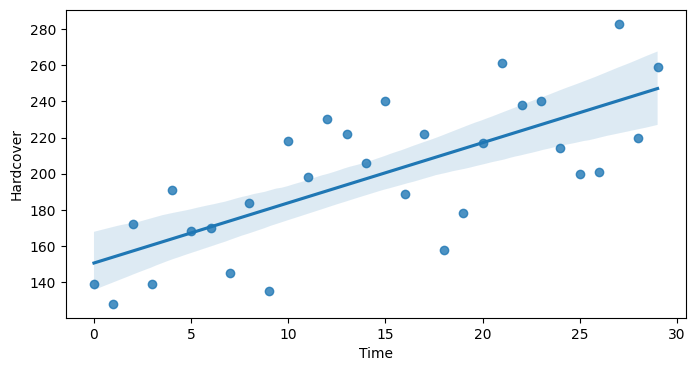

In [17]:
# Create a scatter plot with a regression line using regplot

sns.regplot(x='Time',y='Hardcover',data=df)

In [18]:
'''
y(hardcover)=w*time+b

y(hardcover)=w1*time+w2*previous_day_sales+w3*previous_day_sales
'''
df.head()

,Date,Hardcover,Time,Lag1,Lag2
0,2000-04-01,139,0,NaN,NaN
1,2000-04-02,128,1,139.0,NaN
2,2000-04-03,172,2,128.0,139.0
3,2000-04-04,139,3,172.0,128.0
4,2000-04-05,191,4,139.0,172.0


In [19]:
# fill missing values with zero
df=df.fillna(0)

In [20]:
# partioning the data set into training and testing sets
df_train=df.iloc[:20]
df_test=df.iloc[20:]

In [22]:
# separating feature and target variable
X_train=df_train.loc[:,['Time','Lag1','Lag2']]
y_train=df_train.loc[:,['Hardcover']]

X_test=df_test.loc[:,['Time','Lag1','Lag2']]
y_test=df_test.loc[:,['Hardcover']]

X_train

,Time,Lag1,Lag2
0,0,0.0,0.0
1,1,139.0,0.0
2,2,128.0,139.0
3,3,172.0,128.0
4,4,139.0,172.0
5,5,191.0,139.0
6,6,168.0,191.0
7,7,170.0,168.0
8,8,145.0,170.0
9,9,184.0,145.0


#### Data Preprocessing

In [23]:
#normalization

ss=StandardScaler() 

'''
fit:mean,standard_deviation(fit)
transform: x-mean/standard_deviation
'''

X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

y_train=ss.fit_transform(y_train)
y_test=ss.fit_transform(y_test)

X_train

array([[-1.64750894, -3.33188516, -2.5722822 ],
       [-1.47408695, -0.65017099, -2.5722822 ],
       [-1.30066495, -0.86239297, -0.40269952],
       [-1.12724296, -0.01350504, -0.57439311],
       [-0.95382097, -0.65017099,  0.11238126],
       [-0.78039897,  0.35306021, -0.40269952],
       [-0.60697698, -0.09067667,  0.40894292],
       [-0.43355498, -0.05209085,  0.04994723],
       [-0.26013299, -0.53441354,  0.08116424],
       [-0.086711  ,  0.21800986, -0.30904847],
       [ 0.086711  , -0.72734262,  0.29968336],
       [ 0.26013299,  0.87396872, -0.46513355],
       [ 0.43355498,  0.48811056,  0.83037265],
       [ 0.60697698,  1.10548361,  0.51820248],
       [ 0.78039897,  0.95114035,  1.01767475],
       [ 0.95382097,  0.64245383,  0.89280669],
       [ 1.12724296,  1.29841269,  0.64307055],
       [ 1.30066495,  0.3144744 ,  1.17375984],
       [ 1.47408695,  0.95114035,  0.37772591],
       [ 1.64750894, -0.28360574,  0.89280669]])

In [25]:
# Model training using training set
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [26]:
X_test

array([[-1.5666989 , -1.60266334, -1.70646896],
       [-1.21854359, -0.2784288 , -1.14697094],
       [-0.87038828,  1.2155794 , -0.0559498 ],
       [-0.52223297,  0.43462057,  1.17494584],
       [-0.17407766,  0.50253003,  0.53152312],
       [ 0.17407766, -0.380293  ,  0.58747292],
       [ 0.52223297, -0.85565924, -0.1398745 ],
       [ 0.87038828, -0.82170451, -0.53152312],
       [ 1.21854359,  1.9625835 , -0.50354822],
       [ 1.5666989 , -0.17656461,  1.79039366]])

In [27]:
#Predicting the target variable using linear regression model on test dataset
y_pred=lin_reg.predict(X_test)
y_pred

array([[-1.17520092],
       [-0.900974  ],
       [-0.2737665 ],
       [ 0.71804589],
       [ 0.29557693],
       [ 0.4750884 ],
       [ 0.05738313],
       [-0.18448714],
       [-0.45415322],
       [ 1.44248744]])

In [28]:
# Parameters of the model
lin_reg.intercept_

array([3.68356662e-16])

In [29]:
lin_reg.coef_

array([[ 0.10584755, -0.11713661,  0.70150719]])

In [30]:
# calculating the mean square error
mean_squared_error(y_pred,y_test)

1.4791273104213079

In [31]:
X_test

array([[-1.5666989 , -1.60266334, -1.70646896],
       [-1.21854359, -0.2784288 , -1.14697094],
       [-0.87038828,  1.2155794 , -0.0559498 ],
       [-0.52223297,  0.43462057,  1.17494584],
       [-0.17407766,  0.50253003,  0.53152312],
       [ 0.17407766, -0.380293  ,  0.58747292],
       [ 0.52223297, -0.85565924, -0.1398745 ],
       [ 0.87038828, -0.82170451, -0.53152312],
       [ 1.21854359,  1.9625835 , -0.50354822],
       [ 1.5666989 , -0.17656461,  1.79039366]])

In [32]:
lin_reg.predict([[22, 222, 217]])

array([[128.55137781]])

In [35]:
#Computing R-square score
lin_reg.score(X_test,y_test)

-0.47912731042130763

'''r2 score becomes negative there is no proper relation ship b/w data the model
obtained is not good
'''